# Week 5 Excercise

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from scipy import linalg

mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

2.2.0


#### Downloading MNIST dataset

In [2]:
mnist = keras.datasets.mnist   #Original handwritten digit MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#rescaling images so that they are in range 0-1
train_images=train_images/255.0
test_images=test_images/255.0

#reshaping image arrays so that they can be passed through CNN
train_images=train_images.reshape(train_images.shape[0],28,28,1)
test_images=test_images.reshape(test_images.shape[0],28,28,1)

### Step 1 
Training a neural network on the MNIST training dataset that achieves 95% accuracy or more on the test dataset.

In [3]:
#initiates new model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10))

In [4]:
#compiling model so that we can see how well the model is doing
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#use this to. prevent over fitting of model on the training set
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#fitting model to the data
history = model.fit(train_images, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels),
                             callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2241 - accuracy: 0.9363 - val_loss: 0.1003 - val_accuracy: 0.9704
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0809 - accuracy: 0.9765 - val_loss: 0.0663 - val_accuracy: 0.9787
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0568 - accuracy: 0.9828 - val_loss: 0.0668 - val_accuracy: 0.9778
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0440 - accuracy: 0.9873 - val_loss: 0.0601 - val_accuracy: 0.9803
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0613 - val_accuracy: 0.9802
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0640 - val_accuracy: 0.9816
Epoch 

In [5]:
#evaluates final test accuracy of model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('Test Accuracy is {}%'.format(round(test_acc*100,2)))

Test Accuracy is 98.02%


### Step 2
Decompose the MNIST training dataset into PCA components.

In [6]:
#1. Reshaping datasets
print('Values Based On The Training Dataset')
print("train_images.shape: {}".format(np.shape(train_images)))
X_train=np.reshape(train_images,(60000,784))
X_test=np.reshape(test_images,(10000,784))
print("X_train.shape: {}".format(np.shape(X_train)))

#2. Finding mean of datasets to then centre them at zero
mu_train=np.mean(X_train,axis=0)
mu_test=np.mean(X_test,axis=0)
x_train=X_train-mu_train
x_test=X_test-mu_test

#3. Making the Covariance Matrix of x
rho=np.cov(x_train,rowvar=False)
rho_test=np.cov(x_test,rowvar=False) 
print("rho.shape: {}".format(np.shape(rho)))

#4. Get the eigenvalues and vectors of rho
vals,vecs=linalg.eigh(rho)
vals_test,vecs_test=linalg.eigh(rho_test)

#vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector correspondong to vals[i]
print("vecs.shape: {}".format(np.shape(vecs)))
print("vals.shape: {}".format(np.shape(vals)))

#5. Reversing the order so that the best values come first
vecs=np.flip(vecs)
vals=np.flip(vals)
vecs_test=np.flip(vecs_test)
vals_test=np.flip(vals_test)

P_train=np.dot(x_train,vecs)
P_test=np.dot(x_test,vecs_test)

Values Based On The Training Dataset
train_images.shape: (60000, 28, 28, 1)
X_train.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


### Step 3
We will set up an array of 32 values from 0 to 784, and these will be the values for the different PCA components.
For each of these values we will create a new set of test images to test our model,which hasn't been trained with the reconstructed images, on. Finally we will plot the final test accuracy agaisnt the number of PCA components used.

In [7]:
pca = np.arange(0,784,16) #sets array of values for PCA
l = len(pca)

#empty array to insert values in
new_test_images = np.zeros((l,10000,784))
test_acc1 = np.zeros(l)

for i in range(l):
    #reconstructing image using a subset of the eigenvectors
    new_test_images[i] = (np.dot(P_test[:,0:pca[i]],vecs_test.T[0:pca[i],:]))+mu_test
    
    #evaluate model accuracy with PCAs
    test_loss, test_acc = model.evaluate(np.reshape(new_test_images[i],(10000,28,28,1)),  test_labels, verbose=0)
    test_acc1[i] = test_acc
    print('Step {} out of {}'.format(i+1,l))

Step 1 out of 49
Step 2 out of 49
Step 3 out of 49
Step 4 out of 49
Step 5 out of 49
Step 6 out of 49
Step 7 out of 49
Step 8 out of 49
Step 9 out of 49
Step 10 out of 49
Step 11 out of 49
Step 12 out of 49
Step 13 out of 49
Step 14 out of 49
Step 15 out of 49
Step 16 out of 49
Step 17 out of 49
Step 18 out of 49
Step 19 out of 49
Step 20 out of 49
Step 21 out of 49
Step 22 out of 49
Step 23 out of 49
Step 24 out of 49
Step 25 out of 49
Step 26 out of 49
Step 27 out of 49
Step 28 out of 49
Step 29 out of 49
Step 30 out of 49
Step 31 out of 49
Step 32 out of 49
Step 33 out of 49
Step 34 out of 49
Step 35 out of 49
Step 36 out of 49
Step 37 out of 49
Step 38 out of 49
Step 39 out of 49
Step 40 out of 49
Step 41 out of 49
Step 42 out of 49
Step 43 out of 49
Step 44 out of 49
Step 45 out of 49
Step 46 out of 49
Step 47 out of 49
Step 48 out of 49
Step 49 out of 49


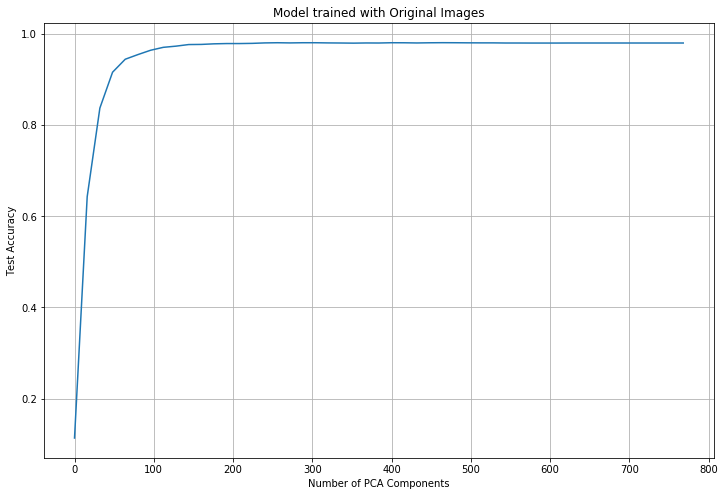

In [8]:
plt.figure(figsize=(12,8))
plt.title('Model trained with Original Images')
plt.plot(pca,test_acc1)
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.grid(True, axis ='both')

We can see here that the first 50 components get to an accuracy of of 80% and the next 50 well over 90%, after this the accuracy changes very little. From this we can see that the first 100 PCA components are the most important ones.

### Step 4
As we have seen previously the best 100 components are the most useful for obtaining a high degree of accuracy. So now we will repeat the previous step but this time we will train our model on images that have been reconstructed from the best 100 PCA components.

In [9]:
#reconstruct training images with the best 100 PCA components 
new_train_images100 = (np.dot(P_train[:,0:100],vecs.T[0:100,:]))+mu_train
train_images_100 = np.reshape(new_train_images100,(60000,28,28,1))        #to make suitable for model

In [10]:
#initiates new model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10))

In [11]:
#compiling model so that we can see how well the model is doing
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#use this to. prevent over fitting of model on the training set
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#fitting model to the data
history = model.fit(train_images_100, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels),
                             callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 5s 5ms/step - loss: 0.2072 - accuracy: 0.9416 - val_loss: 0.0884 - val_accuracy: 0.9753
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0767 - accuracy: 0.9776 - val_loss: 0.0877 - val_accuracy: 0.9743
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0583 - accuracy: 0.9827 - val_loss: 0.0804 - val_accuracy: 0.9752
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0478 - accuracy: 0.9863 - val_loss: 0.0780 - val_accuracy: 0.9772
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0403 - accuracy: 0.9876 - val_loss: 0.0790 - val_accuracy: 0.9772
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0833 - val_accuracy: 0.9760
Epoch 7/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.0867 - val_accuracy: 0.9748
Epoch 

In [12]:
pca = np.arange(0,784,16) #sets array of values for PCA
l = len(pca)

#empty array to insert values in
new_test_images = np.zeros((l,10000,784))
test_acc2 = np.zeros(l)

for i in range(l):
    #reconstructing image using a subset of the eigenvectors
    new_test_images[i] = (np.dot(P_test[:,0:pca[i]],vecs_test.T[0:pca[i],:]))+mu_test
    
    #evaluate model accuracy with PCAs
    test_loss, test_acc = model.evaluate(np.reshape(new_test_images[i],(10000,28,28,1)),  test_labels, verbose=0)
    test_acc2[i] = test_acc
    print('Step {} out of {}'.format(i+1,l))

Step 1 out of 49
Step 2 out of 49
Step 3 out of 49
Step 4 out of 49
Step 5 out of 49
Step 6 out of 49
Step 7 out of 49
Step 8 out of 49
Step 9 out of 49
Step 10 out of 49
Step 11 out of 49
Step 12 out of 49
Step 13 out of 49
Step 14 out of 49
Step 15 out of 49
Step 16 out of 49
Step 17 out of 49
Step 18 out of 49
Step 19 out of 49
Step 20 out of 49
Step 21 out of 49
Step 22 out of 49
Step 23 out of 49
Step 24 out of 49
Step 25 out of 49
Step 26 out of 49
Step 27 out of 49
Step 28 out of 49
Step 29 out of 49
Step 30 out of 49
Step 31 out of 49
Step 32 out of 49
Step 33 out of 49
Step 34 out of 49
Step 35 out of 49
Step 36 out of 49
Step 37 out of 49
Step 38 out of 49
Step 39 out of 49
Step 40 out of 49
Step 41 out of 49
Step 42 out of 49
Step 43 out of 49
Step 44 out of 49
Step 45 out of 49
Step 46 out of 49
Step 47 out of 49
Step 48 out of 49
Step 49 out of 49


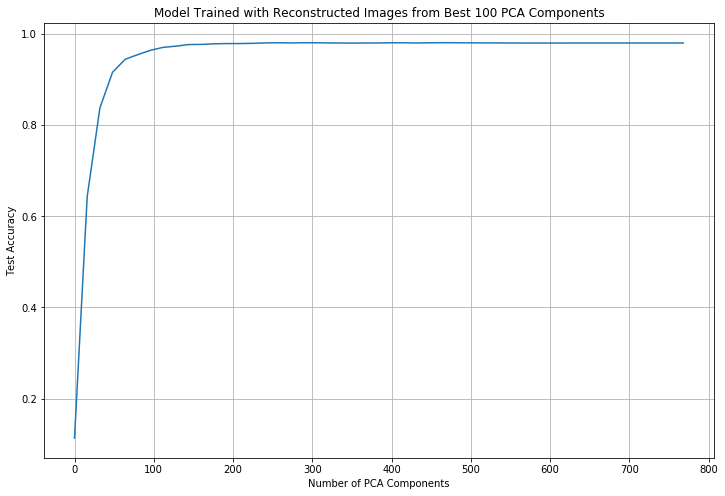

In [13]:
plt.figure(figsize=(12,8))
plt.title('Model Trained with Reconstructed Images from Best 100 PCA Components')
plt.plot(pca,test_acc1)
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.grid(True, axis ='both')

We can see the accuracy increases at a much faster rate in the first 50 PCA components than when the model was trained with the original MNIST dataset, so would be able to be more accurate with less information.

### Step 5
Now we are going to repeat step 4 but insteasd of the best 100 PCA components we will use the best 20.

In [14]:
#reconstruct training images with the best 100 PCA components 
new_train_images100 = (np.dot(P_train[:,0:20],vecs.T[0:20,:]))+mu_train
train_images_100 = np.reshape(new_train_images100,(60000,28,28,1))        #to make suitable for model

In [15]:
#initiates new model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10))

In [16]:
#compiling model so that we can see how well the model is doing
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#use this to. prevent over fitting of model on the training set
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

#fitting model to the data
history = model.fit(train_images_100, train_labels, epochs=50, batch_size=64, 
                    validation_data=(test_images, test_labels),
                             callbacks=[early_stop])

Epoch 1/50
938/938 [==============================] - 6s 6ms/step - loss: 0.2940 - accuracy: 0.9122 - val_loss: 0.5387 - val_accuracy: 0.8297
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1530 - accuracy: 0.9535 - val_loss: 0.4698 - val_accuracy: 0.8564
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1265 - accuracy: 0.9609 - val_loss: 0.4977 - val_accuracy: 0.8542
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1113 - accuracy: 0.9659 - val_loss: 0.5306 - val_accuracy: 0.8469
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1001 - accuracy: 0.9686 - val_loss: 0.6226 - val_accuracy: 0.8264
Epoch 6/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0939 - accuracy: 0.9711 - val_loss: 0.6098 - val_accuracy: 0.8402
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0880 - accuracy: 0.9724 - val_loss: 0.6520 - val_accuracy: 0.8271
Epoch 

In [17]:
pca = np.arange(0,784,16) #sets array of values for PCA
l = len(pca)

#empty array to insert values in
new_test_images = np.zeros((l,10000,784))
test_acc3 = np.zeros(l)

for i in range(l):
    #reconstructing image using a subset of the eigenvectors
    new_test_images[i] = (np.dot(P_test[:,0:pca[i]],vecs_test.T[0:pca[i],:]))+mu_test
    
    #evaluate model accuracy with PCAs
    test_loss, test_acc = model.evaluate(np.reshape(new_test_images[i],(10000,28,28,1)),  test_labels, verbose=0)
    test_acc3[i] = test_acc
    print('Step {} out of {}'.format(i+1,l))

Step 1 out of 49
Step 2 out of 49
Step 3 out of 49
Step 4 out of 49
Step 5 out of 49
Step 6 out of 49
Step 7 out of 49
Step 8 out of 49
Step 9 out of 49
Step 10 out of 49
Step 11 out of 49
Step 12 out of 49
Step 13 out of 49
Step 14 out of 49
Step 15 out of 49
Step 16 out of 49
Step 17 out of 49
Step 18 out of 49
Step 19 out of 49
Step 20 out of 49
Step 21 out of 49
Step 22 out of 49
Step 23 out of 49
Step 24 out of 49
Step 25 out of 49
Step 26 out of 49
Step 27 out of 49
Step 28 out of 49
Step 29 out of 49
Step 30 out of 49
Step 31 out of 49
Step 32 out of 49
Step 33 out of 49
Step 34 out of 49
Step 35 out of 49
Step 36 out of 49
Step 37 out of 49
Step 38 out of 49
Step 39 out of 49
Step 40 out of 49
Step 41 out of 49
Step 42 out of 49
Step 43 out of 49
Step 44 out of 49
Step 45 out of 49
Step 46 out of 49
Step 47 out of 49
Step 48 out of 49
Step 49 out of 49


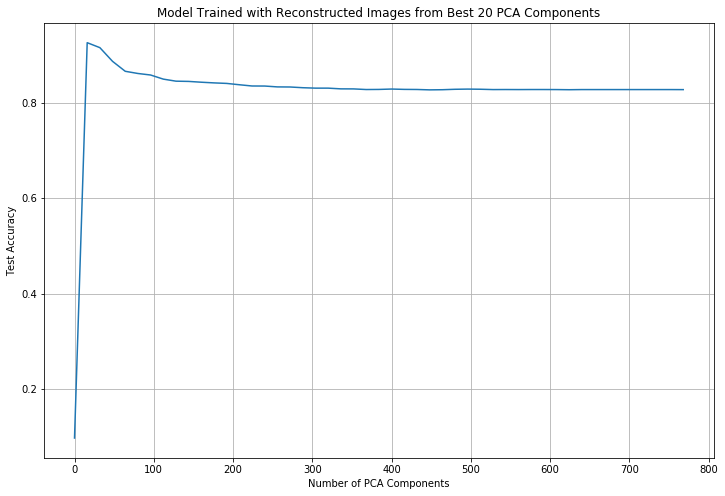

In [18]:
plt.figure(figsize=(12,8))
plt.title('Model Trained with Reconstructed Images from Best 20 PCA Components')
plt.plot(pca,test_acc3)
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.grid(True, axis ='both')

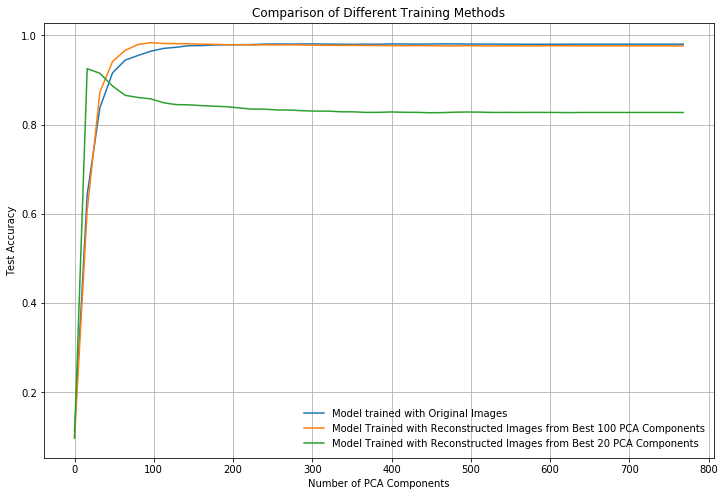

In [19]:
#comparison plot
plt.figure(figsize=(12,8))
plt.title('Comparison of Different Training Methods')
plt.plot(pca,test_acc1,label='Model trained with Original Images')
plt.plot(pca,test_acc2,label='Model Trained with Reconstructed Images from Best 100 PCA Components')
plt.plot(pca,test_acc3,label='Model Trained with Reconstructed Images from Best 20 PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Test Accuracy')
plt.legend()
plt.grid(True, axis ='both')

As we can see the less PCA components you train on allows for a higher peak in accuracy with less components used from the test set. This means that by reconstructing images with a small amount of PCA components allows for quick and accurate results. But as the testing set components increase to the original amount the accuracy decrease, which can be quite sharpe when the PCA number that you train with is very low.